In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [2]:
np.random.seed(1)
X = 1.5 * np.random.randn(100) + 10.5   # Array of 1000 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 1000 residual terms
y = 20 + 0.3 * X  + res 

In [3]:
df = pd.DataFrame({'StudyTime': X,'Score': y})

In [4]:
df

,StudyTime,Score
0,12.936518,23.657391
1,9.582365,23.486963
2,9.707742,23.114069
3,8.890547,22.963953
4,11.798111,22.991978
...,...,...
95,10.616010,22.371084
96,9.984219,23.296425
97,10.565395,23.379760
98,9.569999,23.276475


In [5]:
max(X)


13.778363109799741

In [6]:
min(X)

7.047691954679576

In [7]:
max(y)

25.228858797424788

In [8]:
min(y)

21.57339618758479

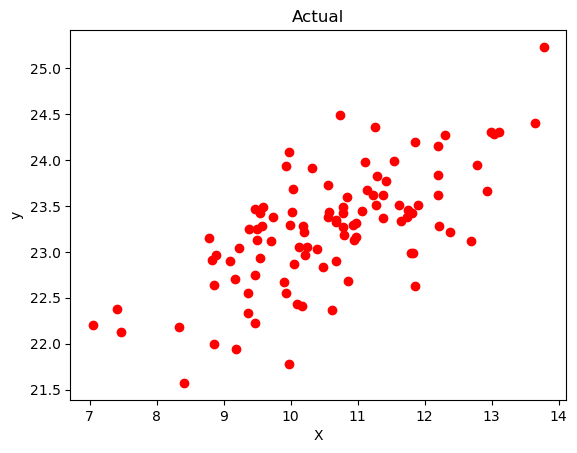

In [9]:
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [10]:
def loss_function(m1, m2, m3, m4,b, points):
    total_error =0
    for i in range(len(points)):
        x=points.iloc[i].StudyTime
        yy=points.iloc[i].Score
        total_error += (yy-(m1*(x) + m2*(x**2) + m3*(x**3) + m4*(x**4) +b))**2
    return total_error/ float(len(points))    
    
    

In [11]:
def gradient_descent(m1_now, m2_now,m3_now,m4_now,b_now,points,L):
    m1_gradient =0
    m2_gradient =0
    m3_gradient =0
    m4_gradient =0
    b_gradient =0
    n=len(points)
    
    for i in range(n):
        x=points.iloc[i].StudyTime
        yy= points.iloc[i].Score
        
        m1_gradient += -(2/n)*(x)*(yy-(m1_now*(x)+m2_now*(x**2) + m3_now*(x**3) + m4_now*(x**4) +b_now))
        m2_gradient += -(2/n)*(x**2)*(yy-(m1_now*(x)+m2_now*(x**2) + m3_now*(x**3) + m4_now*(x**4) +b_now))
        m3_gradient += -(2/n)*(x**3)*(yy-(m1_now*(x)+m2_now*(x**2) + m3_now*(x**3) + m4_now*(x**4) +b_now))
        m4_gradient += -(2/n)*(x**4)*(yy-(m1_now*(x)+m2_now*(x**2) + m3_now*(x**3) + m4_now*(x**4) +b_now))
        b_gradient += -(2/n)*(yy-(m1_now*(x)+m2_now*(x**2) + m3_now*(x**3) + m4_now*(x**4) +b_now))
        
    m1 = m1_now - m1_gradient *L
    m2 = m2_now - m2_gradient *L
    m3 = m3_now - m3_gradient *L
    m4 = m4_now - m4_gradient *L
    b = b_now - b_gradient *L
    return m1,m2,m3,m4,b
    

In [14]:
#m1 =((df['StudyTime'] - np.mean(X)) * (df['Score'] - np.mean(y))).sum()/((df['StudyTime'] - np.mean(X))**2).sum()
#m2 = ((df['StudyTime'] - np.mean(X)) * (df['Score'] - np.mean(y))).sum()/((df['StudyTime'] - np.mean(X))**2).sum()
m1 = 0
m2 = 0
m3 = 0
m4 = 0
#m1 = 0
#m2 = 0
b = 22
#b =np.mean(y) - (m * np.mean(X))
L= 1e-9  #try 0.008 and 0.009
epochs =5000
batch_size = 10
tp_batch = int(len(df)/float(batch_size))
print(f'Batch size = {tp_batch}')
print(m1)
print(m2)
print(m3)
print(m4)
print(b)

Batch size = 10
0
0
0
0
22


In [15]:
for i in range(epochs):
    if i% 50 == 0:
        print(f"Epoch: {i}")
        print(m1,m2,m3,m4,b)
    for j in range(0,batch_size):
        m1,m2,m3,m4,b = gradient_descent(m1,m2,m3,m4,b,df[j*tp_batch:(j+1)*tp_batch],L)
    
#print(m,b)

Epoch: 0
0 0 0 0 22
Epoch: 50
6.734672368562443e-07 5.289394314901051e-06 3.4001802242919335e-05 9.401473134379471e-05 22.000000078334562
Epoch: 100
1.2723957528368844e-06 9.779078897492895e-06 5.9291839413400414e-05 9.17478718387223e-05 22.000000149609363
Epoch: 150
1.8579030710170868e-06 1.4169834472432673e-05 8.402979799764917e-05 8.953050508410967e-05 22.00000021924575
Epoch: 200
2.4302822646914998e-06 1.8463821308246974e-05 0.0001082277334666067 8.736155033086247e-05 22.000000287279473
Epoch: 250
2.9898200074557194e-06 2.266315250072883e-05 0.00013189743804175593 8.523995042967787e-05 22.000000353745534
Epoch: 300
3.5367967129534056e-06 2.676989500302575e-05 0.00015505044644357333 8.31646713157075e-05 22.000000418678173
Epoch: 350
4.071486671571816e-06 3.078607063323436e-05 0.00017769804151445185 8.113470150447388e-05 22.000000482110885
Epoch: 400
4.59415818415244e-06 3.4713657059993075e-05 0.00019985125971884387 7.914905159880033e-05 22.000000544076343
Epoch: 450
5.10507369278173

Epoch: 3500
2.160219018342669e-05 0.0001647265718243095 0.0009399714435134229 1.2819958504775842e-05 22.00000250622384
Epoch: 3550
2.1720465585190676e-05 0.0001656733069625099 0.0009454898289118017 1.2325588323928057e-05 22.000002518821383
Epoch: 3600
2.183581565504052e-05 0.00016659847902559266 0.0009508878796207545 1.1842005908198336e-05 22.000002531061842
Epoch: 3650
2.194830427315034e-05 0.000167502558879831 0.0009561682233296671 1.1368975690442994e-05 22.000002542952927
Epoch: 3700
2.2057993924773952e-05 0.00016838600710941955 0.000961333430348348 1.0906267247473446e-05 22.00000255450233
Epoch: 3750
2.2164945730704988e-05 0.00016924927424099908 0.0009663860148599955 1.0453655187742029e-05 22.000002565717562
Epoch: 3800
2.2269219477072072e-05 0.00017009280096328024 0.0009713284361468157 1.0010919041474883e-05 22.00000257660583
Epoch: 3850
2.2370873644483252e-05 0.0001709170183418681 0.000976163099788866 9.57784315318177e-06 22.000002587174304
Epoch: 3900
2.2469965436533833e-05 0.00

In [32]:
#m=1.11
#b=8
ypred = m1*(X)+m2*(X**2)+m3*(X**3)+m4*(X**4) + b

In [33]:
z=loss_function(m1,m2,m3,m4, b, df)
z

0.23740246808144577

In [34]:
df.iloc[0].StudyTime


12.936518045494863

In [35]:
z= df.iloc[0].StudyTime * m1 + df.iloc[0].StudyTime**2 * m2 + df.iloc[0].StudyTime**3 * m3 + df.iloc[0].StudyTime**4 * m4 + b
z

24.383342477379255

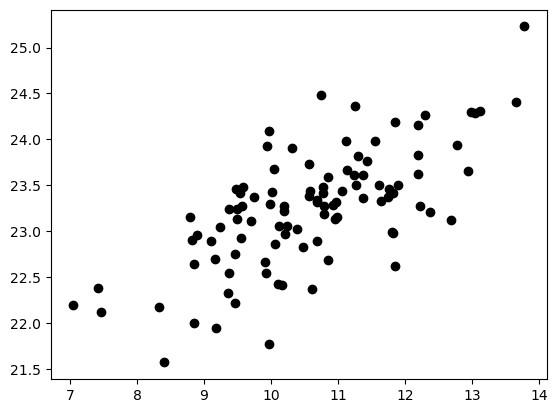

In [36]:
plt.scatter(df.StudyTime,df.Score,color="black")
#plt.plot(list(range(6,14)),[m*x+b for x in range(6,14)], color="red")
plt.show()

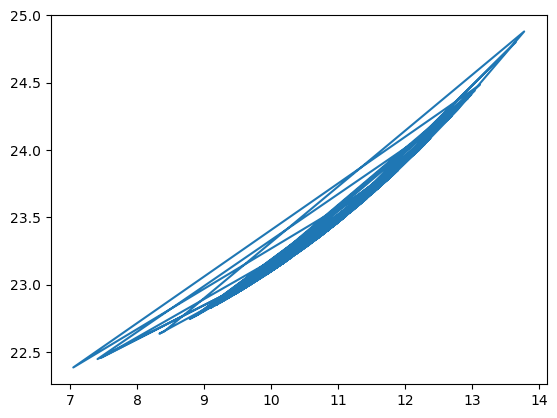

In [37]:
plt.plot(X, ypred,)     # regression line
plt.show()

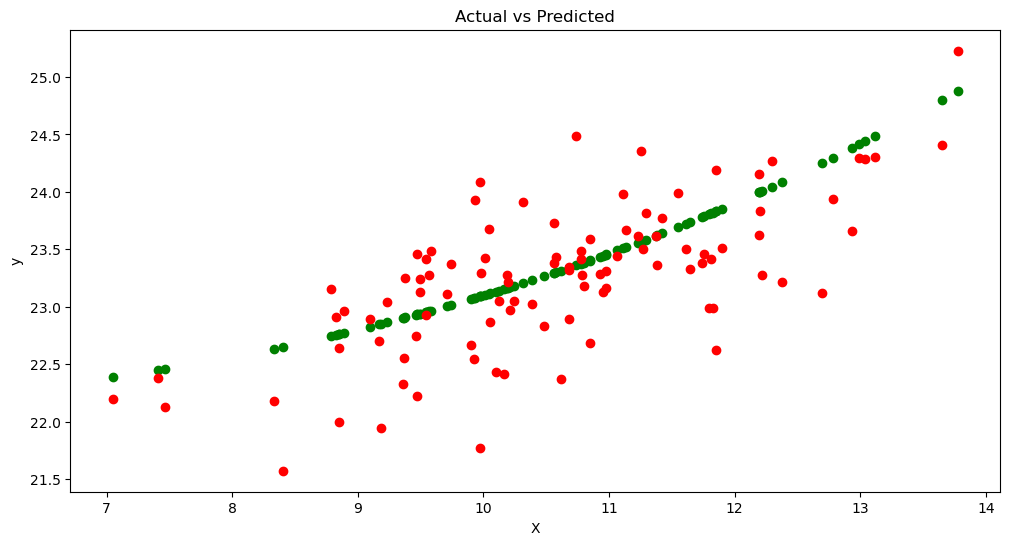

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.scatter(X, ypred, color='green')     # regression line
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [43]:
y = y.reshape(100,1)
ypred = ypred.reshape(100,1)
print(y.shape)
print(ypred.shape)
mae = mean_absolute_error(y,ypred)
rmse = math.sqrt(mean_squared_error(y,ypred))
print(mae)
print(rmse)

(100, 1)
(100, 1)
0.37997736415392525
0.4872396413280079


In [44]:
def predict(value):
    #value = X
    for i in range(value):
        # straight line = m*x+y
       print(i, ':',df.iloc[i].StudyTime,':',df.iloc[i].Score,':', m1 * (df.iloc[i].StudyTime)+m2*(df.iloc[i].StudyTime**2)+m3*(df.iloc[i].StudyTime**3)+m4*(df.iloc[i].StudyTime**4) + b,':',ypred[i])

In [45]:
predict(12)

0 : 12.936518045494863 : 23.65739113125546 : 24.383342477379255 : [24.38334248]
1 : 9.582365379524887 : 23.486963466260214 : 22.96767371271871 : [22.96767371]
2 : 9.707742371604816 : 23.114068532376844 : 23.006133866375638 : [23.00613387]
3 : 8.890547066765745 : 22.96395338164826 : 22.773040125733203 : [22.77304013]
4 : 11.798111443987018 : 22.991977510325583 : 23.80674715076713 : [23.80674715]
5 : 7.047691954679576 : 22.198998802933204 : 22.38586467069467 : [22.38586467]
6 : 13.11721764632472 : 24.305443519445554 : 24.484917341201694 : [24.48491734]
7 : 9.358189648657346 : 22.330606593693233 : 22.90138544210385 : [22.90138544]
8 : 10.978558644085648 : 23.160458340223883 : 23.455360954891812 : [23.45536095]
9 : 10.125944436783884 : 23.054090604381845 : 23.141809411946937 : [23.14180941]
10 : 12.693161905567461 : 23.12138991154686 : 24.251005694994163 : [24.25100569]
11 : 7.409788935753519 : 22.380516376747202 : 22.44817814057949 : [22.44817814]
